In [1]:
import numpy as np
import pandas as pd
import math
import sys
import copy
import glob
import os
from PlotUtility import *
from DataUtility import *

In [2]:
dataPath = "./RotationData/"
mergedDataPath = MergeJsonAndLabel(dataPath, "./", "RotationFinal.json")
dataset = Dataset(mergedDataPath, Debug = True)

      Label  Hand  IndexCurl  MiddleCurl  RingCurl  PinkyCurl  ThumbCurl  \
0     Shaka     1   0.538539    0.778404  0.624762   0.100336   0.262454   
1     Point     1   0.033671    0.546700  0.680783   0.713204   0.568948   
2     Shaka     1   0.593529    0.657947  0.656012   0.568359   0.171371   
3  ThumbsUp     1   0.789177    0.861381  0.885658   0.886880   0.188522   
4     Pinch    -1   0.322187    0.803703  0.882606   0.895974   0.511682   

   NoneXRotation  NoneYRotation  NoneZRotation  ...  PinkyTipZForward  \
0              0              0              0  ...         -0.846054   
1              0              0              0  ...         -0.204759   
2              0              0              0  ...          0.931885   
3              0              0              0  ...         -0.503745   
4              0              0              0  ...         -0.939500   

   PinkyTipXUp  PinkyTipYUp  PinkyTipZUp  PinkyTipXRight  PinkyTipYRight  \
0    -0.905636     0.420066 

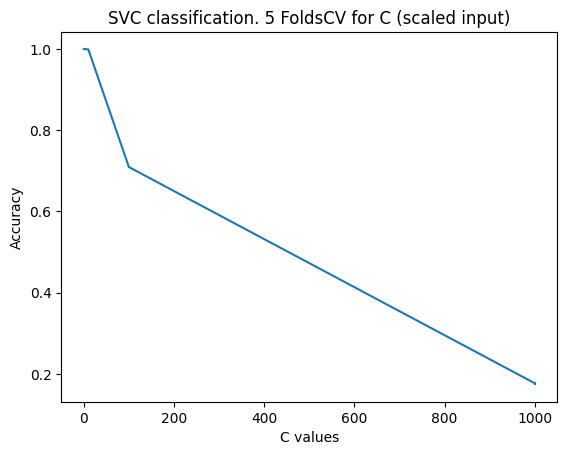

In [3]:
CVals = [0.01,0.1,1,10,100,1000]
mse,std = PerformKFoldsValidationAndPlot("SVC", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

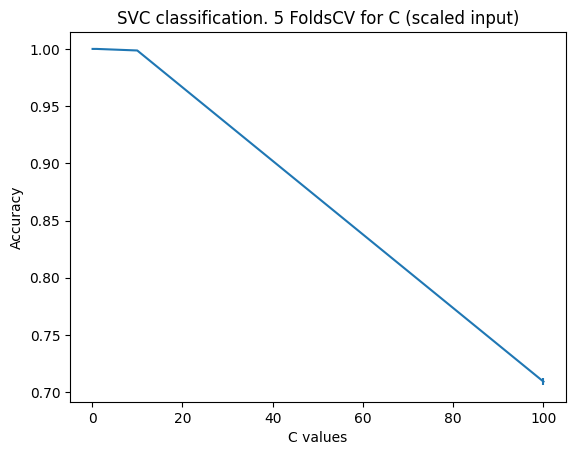

In [4]:
CVals = [0.1,1,10,100]
mse,std = PerformKFoldsValidationAndPlot("SVC", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

In [6]:
idealC = 10
TestValidationAccuracy("SVC", dataset, c = idealC, K = None, scaleInput = True)

Getting Validation accuracy for SVC
Validation Accuracy for SVC : 0.9981640146878825


In [3]:
idealC = 10
SVCModel = MLModel()
SVCModel.AssignModelAndHyperParameters("SVC", c = idealC)
SVCModel.TrainModel(dataset, True)
SVCModel.ExportModel("./", "RotationFeatures")

Fitting SVC
Saving model ./RotationFeaturesModelSVC.joblib
